In [1]:
# Bring in dependencies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Read in data
filepath = Path('crypto_data.csv')
df = pd.read_csv(filepath)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Filter out currencies not currently being traded
tradedf = df.loc[(df['IsTrading'] == True)]

tradedf.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Drop all rows that have at least one null
nonadf = tradedf.dropna(how = 'any')
nonadf = nonadf.drop(columns='IsTrading')

nonadf.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [5]:
# Filter for cryptocurrencies that have been mined
minedf = nonadf.loc[(nonadf['TotalCoinsMined'] > 0)]

# Drop CoinName & original index
minedf = minedf.drop(columns='CoinName')
minedf = minedf.drop(columns='Unnamed: 0')

minedf.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [6]:
# Convert categorical columns into numeric
## This will increase the number of columns!
dumdf = pd.get_dummies(minedf, prefix=['Algorithm', 'ProofType'], columns=['Algorithm', 'ProofType'])

dumdf.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Standardize the dataset
scaler = StandardScaler()
scaleddata = scaler.fit_transform(dumdf)

In [8]:
# Dimensionality reduction
## (Since we now have almost 100 features!)
pca = PCA(n_components = 0.90) # Looking for 90% explained variance
pca_transformed_data = pca.fit_transform(scaleddata)

In [9]:
# Transform PCA data to a DataFrame
df_pca = pd.DataFrame(
    data=pca_transformed_data
)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-1.266896e-11,-1.619756e-14,1.854802e-14,-0.007129,-1.319756,-0.051813,...,-2.943328e-17,-1.628190e-15,-4.185189e-16,8.794398e-16,-9.284059e-16,-1.851279e-16,-4.030770e-15,-3.517208e-15,-3.120659e-16,-2.207235e-15
1,-0.318434,1.032331,-0.591126,0.001386,-1.256567e-11,-1.603305e-14,1.875772e-14,-0.007739,-1.322514,-0.056674,...,-3.750933e-16,-2.249261e-15,-1.368878e-15,1.726122e-15,-7.743451e-16,-1.363041e-16,-5.475716e-15,-3.691386e-15,8.498541e-17,-2.698160e-15
2,2.305468,1.656383,-0.683617,0.004731,-4.292765e-11,-1.779318e-14,3.663700e-14,-0.054781,-1.542879,-0.943951,...,-2.069765e-14,5.059999e-14,1.297215e-14,-4.743833e-14,-2.156463e-14,3.995776e-15,6.108146e-14,1.079485e-14,1.831510e-15,1.019114e-13
3,-0.145184,-1.320593,0.192813,-0.001229,1.114521e-11,4.272979e-15,-8.915563e-15,-0.002071,0.281463,0.251862,...,-4.594302e-15,7.090820e-15,6.383691e-15,-4.074385e-15,-8.289274e-15,6.411749e-15,3.022296e-15,4.236852e-15,-3.298000e-15,9.484947e-15
4,-0.151768,-2.036192,0.396182,-0.001705,1.547472e-11,9.087760e-15,-1.582915e-14,0.027735,0.519099,0.188820,...,8.779275e-15,3.361138e-14,2.896883e-14,-6.970282e-14,-1.745972e-13,1.138857e-13,2.130554e-14,7.910416e-14,-4.658741e-14,2.998087e-14


In [10]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

### Features
Using dimensionality reduction, we only dropped from 98 columns down to 74. There are just too many to further reduce with PCA. Let's try to further reduce the dimensions with t-SNE.

In [11]:
# Feature reduction with t-SNE
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(pca_transformed_data)

In [12]:
# Transform data back into a DataFrame
df_tsne = pd.DataFrame(
    data=transformed_features
)
df_tsne.head()

# Down to only two features!

,0,1
0,13.060702,2.427239
1,19.357742,4.284090
2,20.672211,14.842323
3,-6.247905,32.961395
4,-18.120560,-6.688328


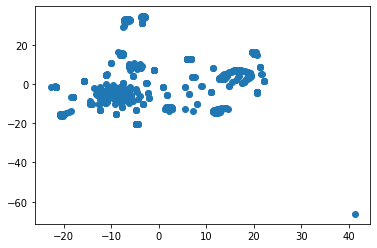

In [13]:
# Plot the t-SNE output
df_plot = df_tsne.copy()
df_plot['x'] = transformed_features[:,0]
df_plot['y'] = transformed_features[:,1]


plt.scatter(df_plot['x'], df_plot['y'])
plt.show()

In [14]:
# The t-SNE plot does not seem to give us clear clusters. There appears to be one outlier.
df_tsne.head()

,0,1
0,13.060702,2.427239
1,19.357742,4.284090
2,20.672211,14.842323
3,-6.247905,32.961395
4,-18.120560,-6.688328


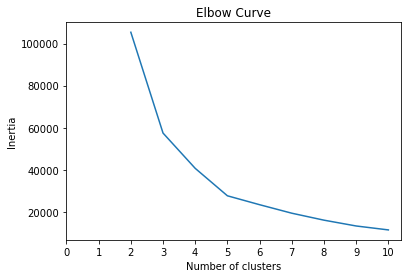

In [20]:
# Finding the best value for k
inertia = []
k = list(range(2, 11))
# k = [1,2,3,4,5,6,7,8,9,10]

# Calculating the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_tsne)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [29]:
# Cluster Analysis with k-Means

# Predicting clusters with k=5

# Initialize the k-means model
model = KMeans(n_clusters=5, random_state=0)

# Fit the model
model.fit(df_tsne)

# Predict clusters
predictions = model.predict(df_tsne)

# Add the predicted class column to the dataframe
finaldf = df_tsne.rename(columns = {0: 'Principal component 1', 1: 'Principal component 2'})
finaldf["class"] = model.labels_
finaldf.head()

,Principal component 1,Principal component 2,class
0,13.060702,2.427239,4
1,19.357742,4.284090,4
2,20.672211,14.842323,4
3,-6.247905,32.961395,3
4,-18.120560,-6.688328,0


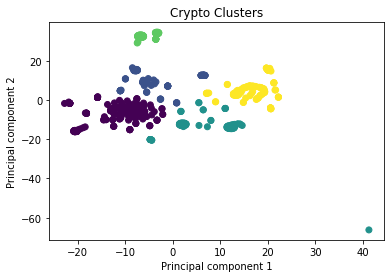

In [30]:
# Visualize the clusters
plt.scatter(x=finaldf['Principal component 1'], y=finaldf['Principal component 2'], c=finaldf['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Crypto Clusters')
plt.show()

## Recommendation

Of the cryptocurrencies on the trading market, we can put them into approximately 5 categories with a classification system. 

After preprocessing the data, we ran it through dimensionality reduction (PCA) and t-SNE to lower the number of features down to two. Using an elbow curve to find the number of clusters to use, we ran a k-means cluster analysis and graphed it above.
